In [43]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import StandardScaler

RAW_DATA_DIR = "../../data/raw data"
OUTPUT_DIR = "../../output/assumption"

# Load the dataset
tnp_20 = pd.read_csv(os.path.join(RAW_DATA_DIR, "2020", "chicago_tnp_trips.csv"))

Saved to: ../../assumption/mccrary_test.pdf


/var/folders/_x/43n5hx2d6hqf1v6v65qbln8c0000gn/T/ipykernel_80512/2123967999.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tnp_20['rounded_time'] = filtered_tnp_20['trip_start_timestamp'].dt.floor('15min')
/var/folders/_x/43n5hx2d6hqf1v6v65qbln8c0000gn/T/ipykernel_80512/2123967999.py:53: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  xticks = pd.date_range(start=start_time, end=end_time, freq='1H')


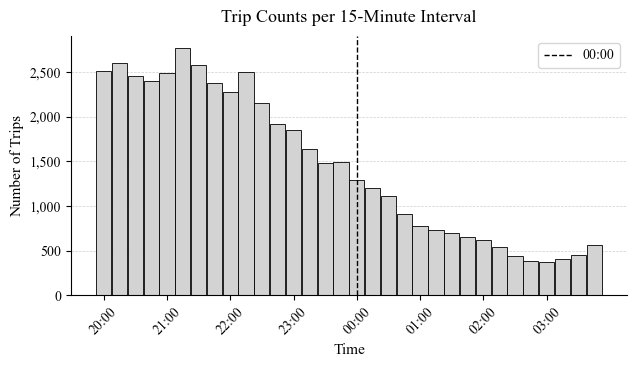

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# AEJ 图表风格设置
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10
})

# 确保 datetime 类型
tnp_20['trip_start_timestamp'] = pd.to_datetime(tnp_20['trip_start_timestamp'])

# 筛选时间段
start_time = pd.Timestamp('2020-01-05 20:00:00')
end_time = pd.Timestamp('2020-01-06 03:59:59')

filtered_tnp_20 = tnp_20[
    (tnp_20['trip_start_timestamp'] >= start_time) &
    (tnp_20['trip_start_timestamp'] <= end_time)
]

# 向下取整至15分钟
filtered_tnp_20['rounded_time'] = filtered_tnp_20['trip_start_timestamp'].dt.floor('15min')

# 统计每15分钟的trip数量
trip_counts = filtered_tnp_20.groupby('rounded_time').size().reset_index(name='trip_count')

# 绘图
fig, ax = plt.subplots(figsize=(6.5, 3.8))

# 绘制柱状图（AEJ 风格）
bar_width = 0.01  # 15分钟宽度，适配 datetime 横轴
ax.bar(trip_counts['rounded_time'], trip_counts['trip_count'],
       width=bar_width, color='lightgray', edgecolor='black', linewidth=0.6, zorder=2)

# 高亮 McCrary Test 断点（00:00）
ax.axvline(pd.Timestamp('2020-01-06 00:00:00'), color='black', linestyle='--', linewidth=1, label='00:00')

# 设置标题与标签
ax.set_title("Trip Counts per 15-Minute Interval", pad=10)
ax.set_xlabel("Time")
ax.set_ylabel("Number of Trips")

# 设置 X 轴刻度：每小时一个点
xticks = pd.date_range(start=start_time, end=end_time, freq='1H')
ax.set_xticks(xticks)
ax.set_xticklabels([x.strftime('%H:%M') for x in xticks], rotation=45)

# Y轴为千位逗号
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# 图例与网格
ax.legend()
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

# 去除右上边框
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()

save_path = "../../output/assumption/mccrary_test.pdf"

if save_path:
        save_dir = os.path.dirname(save_path)
        if save_dir and not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(save_path, dpi=300)
        print(f"Saved to: {save_path}")

plt.show()
